<a href="https://colab.research.google.com/github/luisachaparro-data/proyecto3-L-/blob/main/%3CL%3E_Proyecto_3_Luisa_Chaparro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto 3 <L>



In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving DOT_CODE_DICTIONARY.xlsx to DOT_CODE_DICTIONARY.xlsx
Saving flights_202301.csv to flights_202301.csv
Saving AIRLINE_CODE_DICTIONARY.csv to AIRLINE_CODE_DICTIONARY.csv


In [ ]:
#Actualizar files a pandas
flights = pd.read_csv('flights_202301.csv')
dot_dict = pd.read_excel('DOT_CODE_DICTIONARY.xlsx')
airline_dict = pd.read_csv('AIRLINE_CODE_DICTIONARY.csv')

In [ ]:
# Verificar carga
print("Flights:")
display(flights.head())

print("DOT Dictionary:")
display(dot_dict.head())

print("Airline Dictionary:")
display(airline_dict.head())

Flights:


,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,...,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY
0,2023-01-02,9E,20363,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,757.0,...,25.0,101,NaN,NaN,NaN,NaN,NaN,2023,1,2
1,2023-01-03,9E,20363,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,755.0,...,37.0,101,NaN,NaN,NaN,NaN,NaN,2023,1,3
2,2023-01-04,9E,20363,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,755.0,...,28.0,101,NaN,NaN,NaN,NaN,NaN,2023,1,4
3,2023-01-05,9E,20363,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,754.0,...,38.0,101,NaN,NaN,NaN,NaN,NaN,2023,1,5
4,2023-01-06,9E,20363,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,759.0,...,28.0,101,NaN,NaN,NaN,NaN,NaN,2023,1,6


DOT Dictionary:


,Code,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


Airline Dictionary:


,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


##Nulos

In [ ]:
# Nulos en general para las 3 tablas
print("Nulos en flights:")
print(flights.isnull().sum())

print("\nNulos en dot_dict:")
print(dot_dict.isnull().sum())

print("\nNulos en airline_dict:")
print(airline_dict.isnull().sum())

Nulos en flights:
FL_DATE                         0
AIRLINE_CODE                    0
DOT_CODE                        0
FL_NUMBER                       0
ORIGIN                          0
ORIGIN_CITY                     0
DEST                            0
DEST_CITY                       0
CRS_DEP_TIME                    0
DEP_TIME                     9978
DEP_DELAY                    9982
TAXI_OUT                    10197
WHEELS_OFF                  10197
WHEELS_ON                   10519
TAXI_IN                     10519
CRS_ARR_TIME                    0
ARR_TIME                    10519
ARR_DELAY                   11640
CANCELLED                       0
CANCELLATION_CODE               0
DIVERTED                        0
CRS_ELAPSED_TIME                1
ELAPSED_TIME                11640
AIR_TIME                    11640
DISTANCE                        0
DELAY_DUE_CARRIER          422124
DELAY_DUE_WEATHER          422124
DELAY_DUE_NAS              422124
DELAY_DUE_SECURITY         422

In [ ]:
# Nulos solo en las columnas que los tienen
print("Nulos en flights (solo columnas con nulos):")
print(flights.isnull().sum()[flights.isnull().sum() > 0])

print("\nNulos en dot_dict (solo columnas con nulos):")
print(dot_dict.isnull().sum()[dot_dict.isnull().sum() > 0])

print("\nNulos en airline_dict (solo columnas con nulos):")
print(airline_dict.isnull().sum()[airline_dict.isnull().sum() > 0])

Nulos en flights (solo columnas con nulos):
DEP_TIME                     9978
DEP_DELAY                    9982
TAXI_OUT                    10197
WHEELS_OFF                  10197
WHEELS_ON                   10519
TAXI_IN                     10519
ARR_TIME                    10519
ARR_DELAY                   11640
CRS_ELAPSED_TIME                1
ELAPSED_TIME                11640
AIR_TIME                    11640
DELAY_DUE_CARRIER          422124
DELAY_DUE_WEATHER          422124
DELAY_DUE_NAS              422124
DELAY_DUE_SECURITY         422124
DELAY_DUE_LATE_AIRCRAFT    422124
dtype: int64

Nulos en dot_dict (solo columnas con nulos):
Description    4
dtype: int64

Nulos en airline_dict (solo columnas con nulos):
Code    1
dtype: int64


In [ ]:
# Verificar que los nulos en la tabla "flights" hacen referencia a vuelos cancelados, que no generaron datos por la misma razon.
cols_clave = ['DEP_TIME','DEP_DELAY','TAXI_OUT','WHEELS_OFF']

for col in cols_clave:
    inconsistentes = flights[(flights[col].isnull()) & (flights['CANCELLED'] == 0)]
    print(f"Columna {col}: {len(inconsistentes)} vuelos no cancelados con valor nulo")

Columna DEP_TIME: 0 vuelos no cancelados con valor nulo
Columna DEP_DELAY: 0 vuelos no cancelados con valor nulo
Columna TAXI_OUT: 0 vuelos no cancelados con valor nulo
Columna WHEELS_OFF: 0 vuelos no cancelados con valor nulo


In [ ]:
# Eliminar los 4 nulos de la tabla DOT y 1 de la tabla airline
dot_dict = dot_dict.dropna()
airline_dict = airline_dict.dropna()

In [ ]:
#Despues de limpiar nulos, revisar si todo quedo en orden:
print("dot_dict nulos después de limpiar:")
print(dot_dict.isnull().sum())

print("\nairline_dict nulos después de limpiar:")
print(airline_dict.isnull().sum())

dot_dict nulos después de limpiar:
Code           0
Description    0
dtype: int64

airline_dict nulos después de limpiar:
Code           0
Description    0
dtype: int64


##Duplicados

> Add blockquote



In [ ]:
# Identificacion de duplicados en la tabla de Airline_code
airline_dict.duplicated(subset=["Code"]).sum()

np.int64(0)

In [ ]:
# Identificacion de duplicados en la tabla de DOT_code
dot_dict.duplicated(subset=["Code"]).sum()

np.int64(4)

In [ ]:
# Identificacion de duplicados en la tabla de flights
flights.duplicated(subset=["FL_DATE", "AIRLINE_CODE", "FL_NUMBER", "ORIGIN", "DEST"]).sum()

np.int64(0)

In [ ]:
# Paso 1: identificar los "duplicados" si solo usamos DATE + AIRLINE + FL_NUMBER
dups_parciales = flights[flights.duplicated(subset=["FL_DATE", "AIRLINE_CODE", "FL_NUMBER"], keep=False)]

# Paso 2: ver cuántos casos hay
print("Número de duplicados parciales:", len(dups_parciales))

# Paso 3: agruparlos para revisar diferencias cuando la condicion se le añade ORIGIN y DEST
ejemplo = (dups_parciales
           .groupby(["FL_DATE", "AIRLINE_CODE", "FL_NUMBER"])
           .agg({"ORIGIN": pd.Series.unique, "DEST": pd.Series.unique})
           .reset_index())

# Mostrar las primeras filas para analizar si ORIGIN y DEST tienen un impacto importante
print(ejemplo.head(10))

Número de duplicados parciales: 180570
      FL_DATE AIRLINE_CODE  FL_NUMBER      ORIGIN        DEST
0  2023-01-01           9E       4639  [ATL, ILM]  [ILM, ATL]
1  2023-01-01           9E       4650  [GSP, LGA]  [LGA, GSP]
2  2023-01-01           9E       4666  [ATL, CHA]  [CHA, ATL]
3  2023-01-01           9E       4668  [AVL, LGA]  [LGA, AVL]
4  2023-01-01           9E       4672  [ATL, GNV]  [GNV, ATL]
5  2023-01-01           9E       4677  [ALB, DTW]  [DTW, ALB]
6  2023-01-01           9E       4682  [MOT, MSP]  [MSP, MOT]
7  2023-01-01           9E       4689  [LGA, RDU]  [RDU, LGA]
8  2023-01-01           9E       4694  [DTW, MEM]  [MEM, DTW]
9  2023-01-01           9E       4698  [DTW, MQT]  [MQT, DTW]


In [ ]:
# Filtrar solo los registros que están duplicados en Code
duplicados_dot = dot_dict[dot_dict.duplicated(subset=["Code"], keep=False)]

# Mostrar los duplicados encontrados
print(duplicados_dot)

       Code                        Description
1725  22120            Sparfell Malta Ltd: QFX
1726  22121                Haute Aviation: HUQ
1727  22122  AXIS Aviation Switzerland AG: XQQ
1728  22123                Western Air Ltd: WU
1729  22120            SPARFELL MALTA LTD: QFX
1730  22121                HAUTE AVIATION: HUQ
1731  22122  AXIS AVIATION SWITZERLAND AG: XQQ
1732  22123                WESTERN AIR LTD: WU


In [ ]:
# Eliminar duplicados, conservando la primera fila de estos
dot_dict = dot_dict.drop_duplicates(subset=["Code"], keep="first")

In [ ]:
#Revision de duplicados
print("Duplicados después de eliminarlos:", dot_dict.duplicated(subset=["Code"]).sum())

Duplicados después de eliminarlos: 0


In [ ]:
print("Total vuelos:", len(flights))
print("Cancelados:", (flights["CANCELLED"] == 1).sum())
print("Desviados:", (flights["DIVERTED"] == 1).sum())

Total vuelos: 538837
Cancelados: 10295
Desviados: 1345


##Valores fuera de limites

In [ ]:
# Identificacion de valores fuera de limite en algunas variables
import pandas as pd

# Diccionario para guardar resultados
outliers_summary = {}

# 1. DEP_DELAY y ARR_DELAY (esperado: cualquier valor razonable, pero no > 1000 o < -500)
outliers_summary["DEP_DELAY"] = flights[(flights["DEP_DELAY"] > 1400) | (flights["DEP_DELAY"] < -500)].shape[0]
outliers_summary["ARR_DELAY"] = flights[(flights["ARR_DELAY"] > 1400) | (flights["ARR_DELAY"] < -500)].shape[0]

# 2. CRS_DEP_TIME y CRS_ARR_TIME fuera de rango HHMM
outliers_summary["CRS_DEP_TIME"] = flights[
    (flights["CRS_DEP_TIME"] < 0) |
    (flights["CRS_DEP_TIME"] > 2359) |
    (flights["CRS_DEP_TIME"] % 100 >= 60)
].shape[0]

outliers_summary["CRS_ARR_TIME"] = flights[
    (flights["CRS_ARR_TIME"] < 0) |
    (flights["CRS_ARR_TIME"] > 2359) |
    (flights["CRS_ARR_TIME"] % 100 >= 60)
].shape[0]

# 3. DEP_TIME y ARR_TIME fuera de rango HHMM
outliers_summary["DEP_TIME"] = flights[
    (flights["DEP_TIME"] < 0) |
    (flights["DEP_TIME"] > 2359) |
    (flights["DEP_TIME"] % 100 >= 60)
].shape[0]

outliers_summary["ARR_TIME"] = flights[
    (flights["ARR_TIME"] < 0) |
    (flights["ARR_TIME"] > 2359) |
    (flights["ARR_TIME"] % 100 >= 60)
].shape[0]

# Mostrar resumen
outliers_df = pd.DataFrame.from_dict(outliers_summary, orient="index", columns=["Valores_fuera_de_rango"])
print(outliers_df)

              Valores_fuera_de_rango
DEP_DELAY                         50
ARR_DELAY                         48
CRS_DEP_TIME                       0
CRS_ARR_TIME                       0
DEP_TIME                          48
ARR_TIME                         281


In [ ]:
print("Total vuelos:", len(flights))
print("Cancelados:", (flights["CANCELLED"] == 1).sum())
print("Desviados:", (flights["DIVERTED"] == 1).sum())

Total vuelos: 538837
Cancelados: 10295
Desviados: 1345


In [ ]:
# 👀 Ver ejemplos de outliers en cada variable

# DEP_DELAY fuera de rango
out_dep_delay = flights[(flights["DEP_DELAY"] > 1400) | (flights["DEP_DELAY"] < -500)]
print("🔴 DEP_DELAY outliers:")
display(out_dep_delay[["FL_DATE","ORIGIN","DEST","DEP_DELAY"]].head(10))

# ARR_DELAY fuera de rango
out_arr_delay = flights[(flights["ARR_DELAY"] > 1400) | (flights["ARR_DELAY"] < -500)]
print("🔴 ARR_DELAY outliers:")
display(out_arr_delay[["FL_DATE","ORIGIN","DEST","ARR_DELAY"]].head(10))

# DEP_TIME fuera de rango
out_dep_time = flights[
    (flights["DEP_TIME"] < 0) |
    (flights["DEP_TIME"] > 2359) |
    (flights["DEP_TIME"] % 100 >= 60)
]
print("🔴 DEP_TIME outliers:")
display(out_dep_time[["FL_DATE","ORIGIN","DEST","DEP_TIME"]].head(10))

# ARR_TIME fuera de rango
out_arr_time = flights[
    (flights["ARR_TIME"] < 0) |
    (flights["ARR_TIME"] > 2359) |
    (flights["ARR_TIME"] % 100 >= 60)
]
print("🔴 ARR_TIME outliers:")
display(out_arr_time[["FL_DATE","ORIGIN","DEST","ARR_TIME"]].head(10))


🔴 DEP_DELAY outliers:


,FL_DATE,ORIGIN,DEST,DEP_DELAY
20076,2023-01-03,SNA,JFK,2554.0
22557,2023-01-04,SEA,PHX,1471.0
23384,2023-01-05,AMA,DFW,1684.0
23549,2023-01-01,GRR,DFW,1561.0
25061,2023-01-22,PBI,CLT,2047.0
29193,2023-01-29,SEA,PHX,1673.0
29827,2023-01-30,PNS,CLT,1432.0
29842,2023-01-14,MEM,PHX,1705.0
35097,2023-01-23,MDT,CLT,1418.0
41035,2023-01-26,OKC,CLT,1402.0


🔴 ARR_DELAY outliers:


,FL_DATE,ORIGIN,DEST,ARR_DELAY
20076,2023-01-03,SNA,JFK,2557.0
22082,2023-01-01,LAS,CLT,1414.0
22557,2023-01-04,SEA,PHX,1491.0
23384,2023-01-05,AMA,DFW,1691.0
23549,2023-01-01,GRR,DFW,1554.0
25061,2023-01-22,PBI,CLT,2061.0
29193,2023-01-29,SEA,PHX,1667.0
29842,2023-01-14,MEM,PHX,1688.0
41746,2023-01-03,SBA,DFW,1581.0
43603,2023-01-26,SRQ,CLT,1481.0


🔴 DEP_TIME outliers:


,FL_DATE,ORIGIN,DEST,DEP_TIME
588,2023-01-31,DTW,CLE,2400.0
17143,2023-01-30,LAX,JFK,2400.0
18289,2023-01-18,HNL,LAX,2400.0
23216,2023-01-19,LAX,DFW,2400.0
23226,2023-01-29,LAX,DFW,2400.0
25423,2023-01-01,LAS,CLT,2400.0
25938,2023-01-25,LAS,MIA,2400.0
28916,2023-01-20,DEN,CLT,2400.0
36479,2023-01-19,LAX,CLT,2400.0
42442,2023-01-02,ONT,DFW,2400.0


🔴 ARR_TIME outliers:


,FL_DATE,ORIGIN,DEST,ARR_TIME
89,2023-01-20,JFK,ITH,2400.0
1214,2023-01-21,JFK,SAV,2400.0
1245,2023-01-19,ATL,XNA,2400.0
2300,2023-01-12,ATL,VLD,2400.0
4346,2023-01-12,LGA,GSO,2400.0
5864,2023-01-10,JFK,BGR,2400.0
5875,2023-01-21,JFK,BGR,2400.0
9222,2023-01-25,DTW,GSP,2400.0
10341,2023-01-12,ATL,TYS,2400.0
11033,2023-01-12,JFK,RIC,2400.0


In [ ]:
# Reemplazar 2400 → 0 en horas
flights.loc[flights["DEP_TIME"] == 2400, "DEP_TIME"] = 0
flights.loc[flights["ARR_TIME"] == 2400, "ARR_TIME"] = 0


In [ ]:
# Corregir los campos de hora para que conserven los ceros a la izquierda
time_cols = ["DEP_TIME", "ARR_TIME", "CRS_DEP_TIME", "CRS_ARR_TIME"]

for col in time_cols:
    if col in flights.columns:
        flights[col] = flights[col].fillna(0).astype(int).astype(str).str.zfill(4)

# Confirmación con ejemplos
print(flights[time_cols].head(10))


  DEP_TIME ARR_TIME CRS_DEP_TIME CRS_ARR_TIME
0     0757     0853         0800         0905
1     0755     0857         0800         0905
2     0755     0844         0800         0905
3     0754     0848         0800         0905
4     0759     0849         0800         0905
5     0750     0852         0800         0905
6     1452     1649         1500         1720
7     1450     1655         1500         1720
8     1455     1705         1500         1720
9     2122     2225         2129         2228


In [ ]:
print("Total vuelos:", len(flights))
print("Cancelados:", (flights["CANCELLED"] == 1).sum())
print("Desviados:", (flights["DIVERTED"] == 1).sum())

Total vuelos: 538837
Cancelados: 10295
Desviados: 1345


##Variables categoricas

In [ ]:
#Lista de columnas categóricas a auditar
categorical_cols = [
    "AIRLINE_CODE", "DOT_CODE", "ORIGIN", "ORIGIN_CITY",
    "DEST", "DEST_CITY", "CANCELLATION_CODE",
    "CANCELLED", "DIVERTED"
]

# Mostrar categorías únicas y su cantidad
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Cantidad de categorías únicas: {flights[col].nunique(dropna=False)}")
    print("Ejemplos de categorías:", flights[col].unique()[:20])  # los primeros 20


--- AIRLINE_CODE ---
Cantidad de categorías únicas: 15
Ejemplos de categorías: ['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'WN' 'YX' 'OH' 'OO'
 'UA']

--- DOT_CODE ---
Cantidad de categorías únicas: 15
Ejemplos de categorías: [20363 19805 19930 20409 19790 20436 20368 19690 20398 20416 19393 20452
 20397 20304 19977]

--- ORIGIN ---
Cantidad de categorías únicas: 339
Ejemplos de categorías: ['BDL' 'LGA' 'DLH' 'ATL' 'FAY' 'JFK' 'ORF' 'MSP' 'PIT' 'BWI' 'ROA' 'DTW'
 'TYS' 'CVG' 'ILM' 'CID' 'CRW' 'BGR' 'RDU' 'DAY']

--- ORIGIN_CITY ---
Cantidad de categorías únicas: 333
Ejemplos de categorías: ['Hartford, CT' 'New York, NY' 'Duluth, MN' 'Atlanta, GA'
 'Fayetteville, NC' 'Norfolk, VA' 'Minneapolis, MN' 'Pittsburgh, PA'
 'Baltimore, MD' 'Roanoke, VA' 'Detroit, MI' 'Knoxville, TN'
 'Cincinnati, OH' 'Wilmington, NC' 'Cedar Rapids/Iowa City, IA'
 'Charleston/Dunbar, WV' 'Bangor, ME' 'Raleigh/Durham, NC' 'Dayton, OH'
 'Key West, FL']

--- DEST ---
Cantidad de categorías únicas: 339
Ejemp

In [ ]:
#Unificar el data type de cada variable categorica
flights["FL_DATE"] = pd.to_datetime(flights["FL_DATE"], errors="coerce")
time_cols = ["CRS_DEP_TIME", "DEP_TIME", "CRS_ARR_TIME", "ARR_TIME"]
flights[time_cols] = flights[time_cols].apply(pd.to_numeric, errors="coerce")

In [ ]:
# Cruzar la tabla FLIGHTS con la DOT y AIRLINES DICT para verificar que los datos tienen sentido:
invalid_dot = flights[~flights["DOT_CODE"].isin(dot_dict["Code"])]
print("Códigos DOT no encontrados:", invalid_dot["DOT_CODE"].unique())

invalid_airline = flights[~flights["AIRLINE_CODE"].isin(airline_dict["Code"])]
print("Códigos Airline no encontrados:", invalid_airline["AIRLINE_CODE"].unique())

Códigos DOT no encontrados: []
Códigos Airline no encontrados: []


##Variables numericas

In [ ]:
import numpy as np
import pandas as pd

# --- 1. Detectar outliers por reglas de negocio ---
def detectar_outliers_reglas(df):
    reglas = {
        "DEP_DELAY":   lambda x: (x < -1400) | (x > 1400),
        "ARR_DELAY":   lambda x: (x < -1400) | (x > 1400),
        "TAXI_OUT":    lambda x: (x < 0) | (x > 300),
        "TAXI_IN":     lambda x: (x < 0) | (x > 300),
        "AIR_TIME":    lambda x: (x <= 0) | (x > 1000),
        "DISTANCE":    lambda x: (x <= 0),
    }

    resultados = {}
    for col, regla in reglas.items():
        if col in df.columns:
            mask = regla(df[col])
            resultados[col] = df[mask]
    return resultados


# --- 2. Detectar outliers por Z-score ---
def detectar_outliers_zscore(df, threshold=3):
    resultados = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        zscores = (df[col] - df[col].mean()) / df[col].std(ddof=0)
        mask = np.abs(zscores) > threshold
        resultados[col] = df[mask]
    return resultados


# --- 3. Detectar outliers por IQR ---
def detectar_outliers_iqr(df, factor=1.5):
    resultados = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask = (df[col] < lower) | (df[col] > upper)
        resultados[col] = df[mask]
    return resultados


# --- 4. Ejecutar todo ---
outliers_reglas = detectar_outliers_reglas(flights)
outliers_zscore = detectar_outliers_zscore(flights)
outliers_iqr = detectar_outliers_iqr(flights)

# --- 5. Resumen ---
print("📌 OUTLIERS POR REGLAS DE NEGOCIO:")
for col, df_out in outliers_reglas.items():
    print(f"{col}: {df_out.shape[0]} registros fuera de rango")

print("\n📌 OUTLIERS POR Z-SCORE (>3):")
for col, df_out in outliers_zscore.items():
    print(f"{col}: {df_out.shape[0]} registros extremos")

print("\n📌 OUTLIERS POR IQR:")
for col, df_out in outliers_iqr.items():
    print(f"{col}: {df_out.shape[0]} registros extremos")

📌 OUTLIERS POR REGLAS DE NEGOCIO:
DEP_DELAY: 50 registros fuera de rango
ARR_DELAY: 48 registros fuera de rango
TAXI_OUT: 0 registros fuera de rango
TAXI_IN: 0 registros fuera de rango
AIR_TIME: 0 registros fuera de rango
DISTANCE: 0 registros fuera de rango

📌 OUTLIERS POR Z-SCORE (>3):
DOT_CODE: 0 registros extremos
FL_NUMBER: 67 registros extremos
CRS_DEP_TIME: 0 registros extremos
DEP_TIME: 0 registros extremos
DEP_DELAY: 7656 registros extremos
TAXI_OUT: 9732 registros extremos
WHEELS_OFF: 0 registros extremos
WHEELS_ON: 0 registros extremos
TAXI_IN: 10083 registros extremos
CRS_ARR_TIME: 0 registros extremos
ARR_TIME: 0 registros extremos
ARR_DELAY: 7475 registros extremos
CANCELLED: 10295 registros extremos
DIVERTED: 1345 registros extremos
CRS_ELAPSED_TIME: 8720 registros extremos
ELAPSED_TIME: 7721 registros extremos
AIR_TIME: 8061 registros extremos
DISTANCE: 4831 registros extremos
DELAY_DUE_CARRIER: 1395 registros extremos
DELAY_DUE_WEATHER: 1045 registros extremos
DELAY_DU

##Verificar / Cambiar tipos de datos

In [ ]:
print("=== Flights dtypes ===")
print(flights.dtypes)

print("\n=== DOT Dictionary dtypes ===")
print(dot_dict.dtypes)

print("\n=== Airline Dictionary dtypes ===")
print(airline_dict.dtypes)

=== Flights dtypes ===
FL_DATE                    datetime64[ns]
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                        object
DEST                               object
DEST_CITY                          object
CRS_DEP_TIME                        int64
DEP_TIME                            int64
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                        float64
WHEELS_ON                         float64
TAXI_IN                           float64
CRS_ARR_TIME                        int64
ARR_TIME                            int64
ARR_DELAY                         float64
CANCELLED                           int64
CANCELLATION_CODE                  object
DIVERTED                            int64
CRS_ELAPSED_TIME                  float64
ELAPSED_TIME                      float64
AIR_TIME   

In [ ]:
# Limpieza de data types
import pandas as pd

# Asegurar que son enteros
flights["CANCELLED"] = flights["CANCELLED"].astype(int)
flights["DIVERTED"] = flights["DIVERTED"].astype(int)

# Crear versión categórica para gráficos
flights["CANCELLED_LABEL"] = flights["CANCELLED"].map({0: "No cancelado", 1: "Cancelado"})
flights["DIVERTED_LABEL"] = flights["DIVERTED"].map({0: "No desviado", 1: "Desviado"})
flights["CANCELLED"] = flights["CANCELLED"].astype(bool)
flights["DIVERTED"] = flights["DIVERTED"].astype(bool)

# DOT dict Code como string
dot_dict["Code"] = dot_dict["Code"].astype(str)

# Función robusta para convertir HHMM → datetime
def hhmm_to_datetime(date_series, time_series):
    result = pd.Series(pd.NaT, index=time_series.index)

    def to_hhmm_str(v):
        try:
            if pd.isna(v):
                return None
            iv = int(float(v))
            return f"{iv:04d}"
        except Exception:
            return None

    hhmm = time_series.apply(to_hhmm_str)
    valid_mask = hhmm.notnull()

    if valid_mask.any():
        idx_valid = hhmm[valid_mask].index
        date_part = date_series.loc[idx_valid].astype(str)
        datetime_str = date_part + " " + hhmm[valid_mask].str[:2] + ":" + hhmm[valid_mask].str[2:]
        result.loc[idx_valid] = pd.to_datetime(datetime_str, errors="coerce")

    return result

# Sobrescribir columnas de tiempo directamente
for col in ["CRS_DEP_TIME", "DEP_TIME", "WHEELS_OFF", "WHEELS_ON", "CRS_ARR_TIME", "ARR_TIME"]:
    flights[col] = hhmm_to_datetime(flights["FL_DATE"], flights[col])

# Confirmar cambios
print("=== Flights dtypes ===")
print(flights.dtypes)
print("\n=== DOT Dictionary dtypes ===")
print(dot_dict.dtypes)
print("\n=== Airline Dictionary dtypes ===")
print(airline_dict.dtypes)

# Ejemplo de tiempos corregidos
print("\nEjemplo de tiempos transformados:")
print(flights[["FL_DATE", "CRS_DEP_TIME", "DEP_TIME", "WHEELS_OFF", "WHEELS_ON", "CRS_ARR_TIME", "ARR_TIME"]].head(10))

=== Flights dtypes ===
FL_DATE                    datetime64[ns]
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                        object
DEST                               object
DEST_CITY                          object
CRS_DEP_TIME               datetime64[ns]
DEP_TIME                   datetime64[ns]
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                 datetime64[ns]
WHEELS_ON                  datetime64[ns]
TAXI_IN                           float64
CRS_ARR_TIME               datetime64[ns]
ARR_TIME                   datetime64[ns]
ARR_DELAY                         float64
CANCELLED                            bool
CANCELLATION_CODE                  object
DIVERTED                             bool
CRS_ELAPSED_TIME                  float64
ELAPSED_TIME                      float64
AIR_TIME   

##Nuevas variables

In [ ]:
# 1. Día de la semana
flights["DAY_OF_WEEK"] = flights["FL_DATE"].dt.day_name()

# 2. Hora del día (Agrupado por franja)
flights["DEP_HOUR"] = flights["DEP_TIME"].dt.hour
def assign_time_bin(hour):
    if 5 <= hour < 12:
        return "Mañana"
    elif 12 <= hour < 18:
        return "Tarde"
    elif 18 <= hour < 24:
        return "Noche"
    else:
        return "Madrugada"
flights["DEP_PERIOD"] = flights["DEP_HOUR"].apply(assign_time_bin)

# 3. Retraso total (solo cuando no esté cancelado/diverted)
flights["TOTAL_DELAY"] = flights["DEP_DELAY"].fillna(0) + flights["ARR_DELAY"].fillna(0)

# 4. Tipo de retraso principal
delay_cols = ["DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT"]

flights["MAIN_DELAY_TYPE"] = flights[delay_cols].idxmax(axis=1)
flights["MAIN_DELAY_TYPE"] = flights["MAIN_DELAY_TYPE"].map({
    "DELAY_DUE_CARRIER": "Carrier",
    "DELAY_DUE_WEATHER": "Weather",
    "DELAY_DUE_NAS": "NAS",
    "DELAY_DUE_SECURITY": "Security",
    "DELAY_DUE_LATE_AIRCRAFT": "Late Aircraft"
})
flights.loc[flights[delay_cols].sum(axis=1) == 0, "MAIN_DELAY_TYPE"] = "No Delay"

# 5. Cancelado/divertido en texto
flights["CANCELLED_TEXT"] = flights["CANCELLED"].map({True: "Yes", False: "No"})
flights["DIVERTED_TEXT"]  = flights["DIVERTED"].map({True: "Yes", False: "No"})

# 6. Tiempo de vuelo real
flights["FLIGHT_DURATION"] = flights["AIR_TIME"]
# O en horas, si prefieres:
flights["FLIGHT_DURATION_HOURS"] = flights["AIR_TIME"] / 60

# === Verificación ===
print(flights[["FL_DATE","DAY_OF_WEEK","DEP_TIME","DEP_HOUR","DEP_PERIOD",
               "TOTAL_DELAY","MAIN_DELAY_TYPE","CANCELLED_TEXT","DIVERTED_TEXT",
               "FLIGHT_DURATION","FLIGHT_DURATION_HOURS"]].head())

/tmp/ipython-input-491097752.py:24: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  flights["MAIN_DELAY_TYPE"] = flights[delay_cols].idxmax(axis=1)


     FL_DATE DAY_OF_WEEK            DEP_TIME  DEP_HOUR DEP_PERIOD  \
0 2023-01-02      Monday 2023-01-02 07:57:00         7     Mañana   
1 2023-01-03     Tuesday 2023-01-03 07:55:00         7     Mañana   
2 2023-01-04   Wednesday 2023-01-04 07:55:00         7     Mañana   
3 2023-01-05    Thursday 2023-01-05 07:54:00         7     Mañana   
4 2023-01-06      Friday 2023-01-06 07:59:00         7     Mañana   

   TOTAL_DELAY MAIN_DELAY_TYPE CANCELLED_TEXT DIVERTED_TEXT  FLIGHT_DURATION  \
0        -15.0        No Delay             No            No             25.0   
1        -13.0        No Delay             No            No             37.0   
2        -26.0        No Delay             No            No             28.0   
3        -23.0        No Delay             No            No             38.0   
4        -17.0        No Delay             No            No             28.0   

   FLIGHT_DURATION_HOURS  
0               0.416667  
1               0.616667  
2               0.46666

In [ ]:
# Cambiar negativos de TOTAL_DELAY, para que refleje 0
flights["TOTAL_DELAY"] = flights["DEP_DELAY"].fillna(0) + flights["ARR_DELAY"].fillna(0)
flights["TOTAL_DELAY"] = flights["TOTAL_DELAY"].apply(lambda x: x if x > 0 else 0)

##Union de Tablas

In [ ]:
# Verificaciones antes de unir

print("=== Verificación de llaves y calidad de datos ===")

# 1. Tipos de datos de las llaves
print("\nDtypes de llaves:")
print("Flights DOT_CODE:", flights["DOT_CODE"].dtype)
print("DOT Dict Code:", dot_dict["Code"].dtype)
print("Flights AIRLINE_CODE:", flights["AIRLINE_CODE"].dtype)
print("Airline Dict Code:", airline_dict["Code"].dtype)

# 2. Duplicados en los diccionarios
print("\nDuplicados en DOT Dictionary:", dot_dict["Code"].duplicated().sum())
print("Duplicados en Airline Dictionary:", airline_dict["Code"].duplicated().sum())

# 3. Valores nulos en llaves
print("\nNulos en llaves:")
print("Flights DOT_CODE nulos:", flights["DOT_CODE"].isna().sum())
print("Flights AIRLINE_CODE nulos:", flights["AIRLINE_CODE"].isna().sum())

# 4. Cobertura de llaves (Flights vs Diccionarios)
missing_dot = flights[~flights["DOT_CODE"].astype(str).isin(dot_dict["Code"])]
missing_airline = flights[~flights["AIRLINE_CODE"].isin(airline_dict["Code"])]

print("\nDOT_CODE en Flights sin correspondencia en DOT Dict:", missing_dot["DOT_CODE"].nunique())
print("AIRLINE_CODE en Flights sin correspondencia en Airline Dict:", missing_airline["AIRLINE_CODE"].nunique())

# 5. Ejemplos de valores que no matchean
if not missing_dot.empty:
    print("\nEjemplo DOT_CODE sin match:", missing_dot["DOT_CODE"].unique()[:10])

if not missing_airline.empty:
    print("\nEjemplo AIRLINE_CODE sin match:", missing_airline["AIRLINE_CODE"].unique()[:10])

=== Verificación de llaves y calidad de datos ===

Dtypes de llaves:
Flights DOT_CODE: int64
DOT Dict Code: object
Flights AIRLINE_CODE: object
Airline Dict Code: object

Duplicados en DOT Dictionary: 0
Duplicados en Airline Dictionary: 0

Nulos en llaves:
Flights DOT_CODE nulos: 0
Flights AIRLINE_CODE nulos: 0

DOT_CODE en Flights sin correspondencia en DOT Dict: 0
AIRLINE_CODE en Flights sin correspondencia en Airline Dict: 0


In [ ]:
# Normalizar tipos de datos para DOT Code antes de unir tablas
flights["DOT_CODE"] = flights["DOT_CODE"].astype(str)
dot_dict["Code"] = dot_dict["Code"].astype(str)
airline_dict["Code"] = airline_dict["Code"].astype(str)

# Confirmar cambio
print("Flights DOT_CODE dtype:", flights["DOT_CODE"].dtype)
print("DOT Dict Code dtype:", dot_dict["Code"].dtype)
print("Airline Dict Code dtype:", airline_dict["Code"].dtype)

Flights DOT_CODE dtype: object
DOT Dict Code dtype: object
Airline Dict Code dtype: object


In [ ]:
# Crear tabla unida sin modificar "flights" original
flights_full = flights.merge(
    dot_dict.rename(columns={"Code": "DOT_CODE", "Description": "DOT_DESCRIPTION"}),
    on="DOT_CODE", how="left"
).merge(
    airline_dict.rename(columns={"Code": "AIRLINE_CODE", "Description": "AIRLINE_DESCRIPTION"}),
    on="AIRLINE_CODE", how="left"
)

# Verificar columnas clave
print(flights_full[["FL_DATE", "AIRLINE_CODE", "AIRLINE_DESCRIPTION", "DOT_CODE", "DOT_DESCRIPTION"]].head())

     FL_DATE AIRLINE_CODE AIRLINE_DESCRIPTION DOT_CODE        DOT_DESCRIPTION
0 2023-01-02           9E   Endeavor Air Inc.    20363  Endeavor Air Inc.: 9E
1 2023-01-03           9E   Endeavor Air Inc.    20363  Endeavor Air Inc.: 9E
2 2023-01-04           9E   Endeavor Air Inc.    20363  Endeavor Air Inc.: 9E
3 2023-01-05           9E   Endeavor Air Inc.    20363  Endeavor Air Inc.: 9E
4 2023-01-06           9E   Endeavor Air Inc.    20363  Endeavor Air Inc.: 9E


##Tablas auxiliares

In [ ]:
#Tabla auxiliar para verificar: Retrasos promedio y total por aerolínea
delays_by_airline = flights_full.groupby("AIRLINE_DESCRIPTION").agg({
    "DEP_DELAY": "mean",
    "ARR_DELAY": "mean",
    "TOTAL_DELAY": ["mean", "sum", "count"]
}).reset_index()

# Renombrar columnas para mayor claridad
delays_by_airline.columns = [
    "AIRLINE", "AVG_DEP_DELAY", "AVG_ARR_DELAY",
    "AVG_TOTAL_DELAY", "SUM_TOTAL_DELAY", "NUM_FLIGHTS"
]

delays_by_airline.head()

,AIRLINE,AVG_DEP_DELAY,AVG_ARR_DELAY,AVG_TOTAL_DELAY,SUM_TOTAL_DELAY,NUM_FLIGHTS
0,Alaska Airlines Inc.,6.375320,3.266104,21.935256,434340.0,19801
1,Allegiant Air,17.502411,15.802548,45.430412,391383.0,8615
2,American Airlines Inc.,14.610332,10.787078,35.644955,2673336.0,74999
3,Delta Air Lines Inc.,13.355143,6.402558,30.818754,2316769.0,75174
4,Endeavor Air Inc.,12.109174,7.204544,31.947005,540735.0,16926


In [ ]:
# Tabla auxiliar para verificar: Cancelaciones y desvíos por ciudad de origen de los vuelos
cancellations_by_city = flights_full.groupby("ORIGIN_CITY").agg({
    "CANCELLED": "sum",      # total de vuelos cancelados
    "DIVERTED": "sum",       # total de vuelos desviados
    "FL_NUMBER": "count"     # total de vuelos desde esa ciudad
}).reset_index()

# Renombrar columnas para mayor claridad
cancellations_by_city = cancellations_by_city.rename(columns={
    "CANCELLED": "NUM_CANCELLED",
    "DIVERTED": "NUM_DIVERTED",
    "FL_NUMBER": "NUM_FLIGHTS"
})


In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)  # para mostrar todas las columnas
cancellations_by_city.head(10)

,ORIGIN_CITY,NUM_CANCELLED,NUM_DIVERTED,NUM_FLIGHTS
0,"Aberdeen, SD",3,0,61
1,"Abilene, TX",4,0,107
2,"Adak Island, AK",2,0,8
3,"Aguadilla, PR",7,0,258
4,"Akron, OH",6,0,199
5,"Albany, GA",0,0,82
6,"Albany, NY",11,2,973
7,"Albuquerque, NM",32,5,1690
8,"Alexandria, LA",8,0,152
9,"Allentown/Bethlehem/Easton, PA",3,1,300


##Agrupar los datos según variables categóricas

In [ ]:
# Ver todas las columnas de flights_full
print(flights_full.columns.tolist())

['FL_DATE', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FL_YEAR', 'FL_MONTH', 'FL_DAY', 'CANCELLED_LABEL', 'DIVERTED_LABEL', 'DAY_OF_WEEK', 'DEP_HOUR', 'DEP_PERIOD', 'TOTAL_DELAY', 'MAIN_DELAY_TYPE', 'CANCELLED_TEXT', 'DIVERTED_TEXT', 'FLIGHT_DURATION', 'FLIGHT_DURATION_HOURS', 'DOT_DESCRIPTION', 'AIRLINE_DESCRIPTION']


In [ ]:
# ============================================
# Agrupaciones y métricas
# ============================================

# Por aerolínea
by_airline = flights_full.groupby("AIRLINE_DESCRIPTION").agg(
    TOTAL_FLIGHTS=("FL_NUMBER", "count"),
    CANCELLED_FLIGHTS=("CANCELLED", "sum"),
    DIVERTED_FLIGHTS=("DIVERTED", "sum")
).reset_index()

by_airline["CANCELLED_PCT"] = by_airline["CANCELLED_FLIGHTS"] / by_airline["TOTAL_FLIGHTS"] * 100
by_airline["DIVERTED_PCT"] = by_airline["DIVERTED_FLIGHTS"] / by_airline["TOTAL_FLIGHTS"] * 100


# Por ciudad de origen
by_origin_city = flights_full.groupby("ORIGIN_CITY").agg(
    TOTAL_FLIGHTS=("FL_NUMBER", "count"),
    CANCELLED_FLIGHTS=("CANCELLED", "sum"),
    DIVERTED_FLIGHTS=("DIVERTED", "sum")
).reset_index()

by_origin_city["CANCELLED_PCT"] = by_origin_city["CANCELLED_FLIGHTS"] / by_origin_city["TOTAL_FLIGHTS"] * 100
by_origin_city["DIVERTED_PCT"] = by_origin_city["DIVERTED_FLIGHTS"] / by_origin_city["TOTAL_FLIGHTS"] * 100


# Por ciudad de destino
by_dest_city = flights_full.groupby("DEST_CITY").agg(
    TOTAL_FLIGHTS=("FL_NUMBER", "count"),
    AVG_ARR_DELAY=("ARR_DELAY", "mean"),
    CANCELLED_FLIGHTS=("CANCELLED", "sum"),
    DIVERTED_FLIGHTS=("DIVERTED", "sum")
).reset_index()

by_dest_city["CANCELLED_PCT"] = by_dest_city["CANCELLED_FLIGHTS"] / by_dest_city["TOTAL_FLIGHTS"] * 100
by_dest_city["DIVERTED_PCT"] = by_dest_city["DIVERTED_FLIGHTS"] / by_dest_city["TOTAL_FLIGHTS"] * 100


# Por día de la semana
by_day_of_week = flights_full.groupby("DAY_OF_WEEK").agg(
    TOTAL_FLIGHTS=("FL_NUMBER", "count"),
    AVG_DEP_DELAY=("DEP_DELAY", "mean"),
    AVG_ARR_DELAY=("ARR_DELAY", "mean"),
    CANCELLED_FLIGHTS=("CANCELLED", "sum")
).reset_index()

by_day_of_week["CANCELLED_PCT"] = by_day_of_week["CANCELLED_FLIGHTS"] / by_day_of_week["TOTAL_FLIGHTS"] * 100


# Por hora del día (salida con DEP_PERIOD)
by_dep_hour = flights_full.groupby("DEP_PERIOD").agg(
    TOTAL_FLIGHTS=("FL_NUMBER", "count"),
    AVG_DEP_DELAY=("DEP_DELAY", "mean"),
    CANCELLED_FLIGHTS=("CANCELLED", "sum")
).reset_index()

by_dep_hour["CANCELLED_PCT"] = by_dep_hour["CANCELLED_FLIGHTS"] / by_dep_hour["TOTAL_FLIGHTS"] * 100


# Por tipo de retraso principal
by_delay_type = flights_full.groupby("MAIN_DELAY_TYPE").agg(
    AFFECTED_FLIGHTS=("FL_NUMBER", "count")
).reset_index()

total_delayed = by_delay_type["AFFECTED_FLIGHTS"].sum()
by_delay_type["PCT_OF_TOTAL"] = by_delay_type["AFFECTED_FLIGHTS"] / total_delayed * 100


# ============================================
# Ejemplos
# ============================================
print("\n Retrasos y cancelaciones por aerolínea:")
print(by_airline.head())

print("\n Cancelaciones por ciudad de origen:")
print(by_origin_city.head())

print("\n Retrasos por ciudad de destino:")
print(by_dest_city.head())

print("\n Retrasos por día de la semana:")
print(by_day_of_week)

print("\n Retrasos por hora de salida:")
print(by_dep_hour)

print("\n Retrasos por tipo principal:")
print(by_delay_type)


 Retrasos y cancelaciones por aerolínea:
      AIRLINE_DESCRIPTION  TOTAL_FLIGHTS  CANCELLED_FLIGHTS  DIVERTED_FLIGHTS  \
0    Alaska Airlines Inc.          19801                280               100   
1           Allegiant Air           8615                115                22   
2  American Airlines Inc.          74999               1417               128   
3    Delta Air Lines Inc.          75174                586               169   
4       Endeavor Air Inc.          16926                249                40   

   CANCELLED_PCT  DIVERTED_PCT  
0       1.414070      0.505025  
1       1.334881      0.255369  
2       1.889359      0.170669  
3       0.779525      0.224812  
4       1.471110      0.236323  

 Cancelaciones por ciudad de origen:
       ORIGIN_CITY  TOTAL_FLIGHTS  CANCELLED_FLIGHTS  DIVERTED_FLIGHTS  \
0     Aberdeen, SD             61                  3                 0   
1      Abilene, TX            107                  4                 0   
2  Adak Islan

##Visualizar Las Variables Categóricas

**¿Cuál es el porcentaje de vuelos cancelados y retrasados respecto al total?**

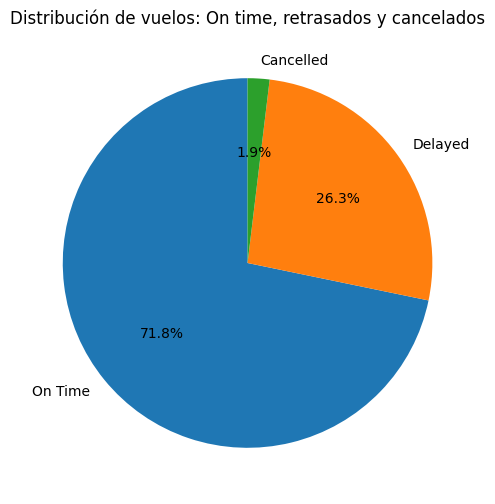

In [ ]:
# @title
#1. Porcentaje de vuelos cancelados y retrasados(<15 min) respecto al total
import matplotlib.pyplot as plt

# Definir retrasado como >15 minutos
flights["DELAYED"] = flights["TOTAL_DELAY"] > 15

# Resumen
summary = {
    "On Time": ((flights["CANCELLED"] == 0) & (flights["DELAYED"] == False)).sum(),
    "Delayed": flights["DELAYED"].sum(),
    "Cancelled": flights["CANCELLED"].sum()
}

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(summary.values(), labels=summary.keys(), autopct="%.1f%%", startangle=90)
plt.title("Distribución de vuelos: On time, retrasados y cancelados")
plt.show()


**¿Existen aeropuertos con mayor probabilidad de demoras o cancelaciones?**

In [ ]:
# @title

# Aeropuertos con mayor probabilidad de demoras o cancelaciones
# 🔹 Crear tabla base de aeropuertos
airport_stats = flights_full.groupby("ORIGIN_CITY").agg(
    CANCEL_RATE=("CANCELLED", "mean"),
    AVG_DEP_DELAY=("DEP_DELAY", "mean"),
    NUM_FLIGHTS=("FL_NUMBER", "count")
).reset_index()

# 🔹 Filtrar aeropuertos con volumen significativo (ejemplo: >100 vuelos)
airport_stats = airport_stats[airport_stats["NUM_FLIGHTS"] > 100]


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import ipywidgets as widgets
from ipywidgets import interact

# 🔹 Lista de aeropuertos
aeropuertos = airport_stats["ORIGIN_CITY"].unique().tolist()

def plot_airport_stats(selected_airports):
    if not selected_airports or "Todos" in selected_airports:
        airport_filtered = airport_stats.sort_values("CANCEL_RATE", ascending=False).head(10)
    else:
        airport_filtered = airport_stats[airport_stats["ORIGIN_CITY"].isin(selected_airports)]

    # --- Cancelaciones ---
    plt.figure(figsize=(12,6))
    ax = sns.barplot(
        data=airport_filtered.sort_values("CANCEL_RATE", ascending=False),
        x="ORIGIN_CITY",
        y="CANCEL_RATE",
        color="red"
    )

    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

    for p in ax.patches:
        value = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2,
            value/2,
            f"{value:.1%}",
            ha="center", va="center", color="black", fontsize=8, fontweight="bold"
        )

    plt.ylabel("% Cancelaciones")
    plt.title("Tasa de cancelación - Aeropuertos seleccionados")
    plt.xticks(rotation=45, fontsize=8, ha="right")
    plt.tight_layout()
    plt.show()

    # --- Retrasos promedio ---
    plt.figure(figsize=(12,6))
    ax2 = sns.barplot(
        data=airport_filtered.sort_values("AVG_DEP_DELAY", ascending=False),
        x="ORIGIN_CITY",
        y="AVG_DEP_DELAY",
        color="steelblue"
    )

    for p in ax2.patches:
        value = p.get_height()
        ax2.text(
            p.get_x() + p.get_width()/2,
            value/2,
            f"{value:.1f}",
            ha="center", va="center", color="white", fontsize=8, fontweight="bold"
        )

    plt.ylabel("Retraso promedio en salida (min)")
    plt.title("Retrasos promedio - Aeropuertos seleccionados")
    plt.xticks(rotation=45, fontsize=8, ha="right")
    plt.tight_layout()
    plt.show()

# 🔹 Widget dinámico
interact(
    plot_airport_stats,
    selected_airports=widgets.SelectMultiple(
        options=["Todos"] + aeropuertos,
        value=["Todos"],  # por defecto → todos (Top 10 cancelaciones)
        description="Aeropuerto",
        style={'description_width': 'initial'},
        layout=widgets.Layout(width="50%")
    )
);



interactive(children=(SelectMultiple(description='Aeropuerto', index=(0,), layout=Layout(width='50%'), options…

**¿Qué aerolíneas presentan mayor tasa de cancelación/retraso?**

In [ ]:
# @title
#Aerolíneas con mayor tasa de cancelación/retraso
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_airline_stats(Aerolinea):
    # 🔹 Filtrar
    if not Aerolinea or "Todas" in Aerolinea:
        airline_filtered = by_airline.copy()
    else:
        airline_filtered = by_airline[by_airline["AIRLINE_DESCRIPTION"].isin(Aerolinea)]

    # Ordenar por % cancelaciones
    by_airline_sorted = airline_filtered.sort_values("CANCELLED_PCT", ascending=False)

    # Asegurar retraso promedio
    if "AVG_TOTAL_DELAY" not in by_airline_sorted.columns:
        by_airline_sorted["AVG_TOTAL_DELAY"] = (
            flights_full.groupby("AIRLINE_DESCRIPTION")["TOTAL_DELAY"].mean().values
        )

    # --- Gráfico ---
    fig, ax1 = plt.subplots(figsize=(12,6))

    # Barras = retraso promedio
    sns.barplot(
        data=by_airline_sorted,
        x="AVG_TOTAL_DELAY",
        y="AIRLINE_DESCRIPTION",
        color="skyblue",
        ax=ax1,
        label="Retraso promedio (min)"
    )

    ax1.set_xlabel("Retraso promedio (min)")
    ax1.set_ylabel("Aerolínea")

    # Línea = % cancelados
    ax2 = ax1.twiny()
    ax2.plot(
        by_airline_sorted["CANCELLED_PCT"],
        by_airline_sorted["AIRLINE_DESCRIPTION"],
        color="green", marker="o", label="% Cancelados"
    )

    # Etiquetas de la línea, un poco hacia abajo
    for i, (x, y) in enumerate(zip(by_airline_sorted["CANCELLED_PCT"], by_airline_sorted["AIRLINE_DESCRIPTION"])):
        ax2.text(
            x + 0.5,  # un poco a la derecha
            i - 0.2,  # hacia abajo
            f"{x:.1f}%",
            va="top", fontsize=9, color="red"
        )

    ax2.set_xlabel("% Cancelados")

    # Título y leyenda
    fig.suptitle("Tasa de cancelación y retraso promedio por aerolínea", fontsize=14)
    ax1.legend(loc="lower center")
    plt.tight_layout()
    plt.show()


# 🔹 Widget dinámico
aerolineas = by_airline["AIRLINE_DESCRIPTION"].unique().tolist()

interact(
    plot_airline_stats,
    Aerolinea=widgets.SelectMultiple(
        options=["Todas"] + aerolineas,
        value=["Todas"],  # por defecto → todas
        description="Aerolinea",
        style={'description_width': 'initial'},
        layout=widgets.Layout(width="50%")
    )
);

interactive(children=(SelectMultiple(description='Aerolinea', index=(0,), layout=Layout(width='50%'), options=…

**¿Cuál es la duración promedio de los retrasos?**

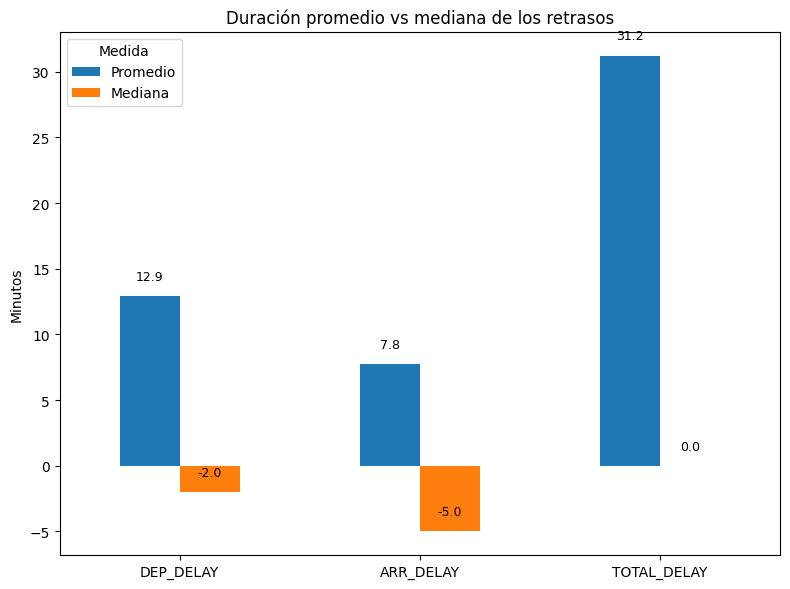

In [ ]:
# @title
# ¿Cuál es la duración promedio de los retrasos?
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionamos las columnas de retraso
cols = ["DEP_DELAY", "ARR_DELAY", "TOTAL_DELAY"]

# Calculamos promedio y mediana
promedios = flights_full[cols].mean()
medianas = flights_full[cols].median()

# Armamos dataframe para graficar
delay_stats = pd.DataFrame({
    "Promedio": promedios,
    "Mediana": medianas
}, index=cols)

# --- Gráfico ---
delay_stats.plot(kind="bar", figsize=(8,6))
plt.title("Duración promedio vs mediana de los retrasos")
plt.ylabel("Minutos")
plt.xticks(rotation=0)

# Etiquetas encima de las barras
for i, col in enumerate(delay_stats.columns):
    for j, value in enumerate(delay_stats[col]):
        plt.text(j + (i-0.5)*0.25, value + 1, f"{value:.1f}",
                 ha="center", va="bottom", fontsize=9)

plt.legend(title="Medida")
plt.tight_layout()
plt.show()

**Aplicar Medidas De Tendencia Central**

In [ ]:
# @title
import pandas as pd

vars_delay = ["DEP_DELAY", "ARR_DELAY", "TOTAL_DELAY"]

# Diccionario para guardar resultados
tendencia_central = {}

for col in vars_delay:
    tendencia_central[col] = {
        "Media": flights_full[col].mean(),
        "Mediana": flights_full[col].median(),
        "Moda": flights_full[col].mode()[0] if not flights_full[col].mode().empty else None
    }

# Convertimos a DataFrame
tendencia_central_df = pd.DataFrame(tendencia_central).T
print(tendencia_central_df)


                 Media  Mediana  Moda
DEP_DELAY    12.937247     -2.0  -5.0
ARR_DELAY     7.776393     -5.0 -12.0
TOTAL_DELAY  31.229492      0.0   0.0


**Visualizar la distribución de variables numéricas**

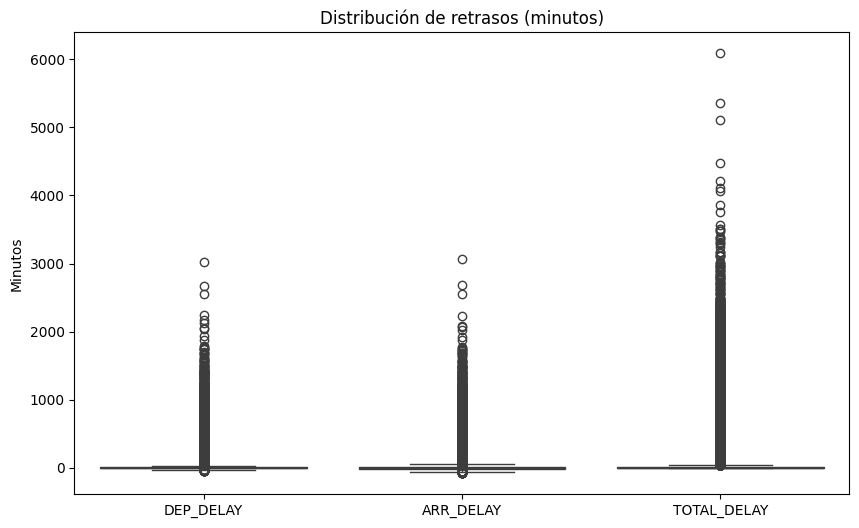

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Box plot Delays
# ===============================
plt.figure(figsize=(10,6))
sns.boxplot(data=flights_full[["DEP_DELAY","ARR_DELAY","TOTAL_DELAY"]])
plt.title("Distribución de retrasos (minutos)")
plt.ylabel("Minutos")
plt.show()

**¿Qué rutas (origen-destino) son más propensas a incidentes?**

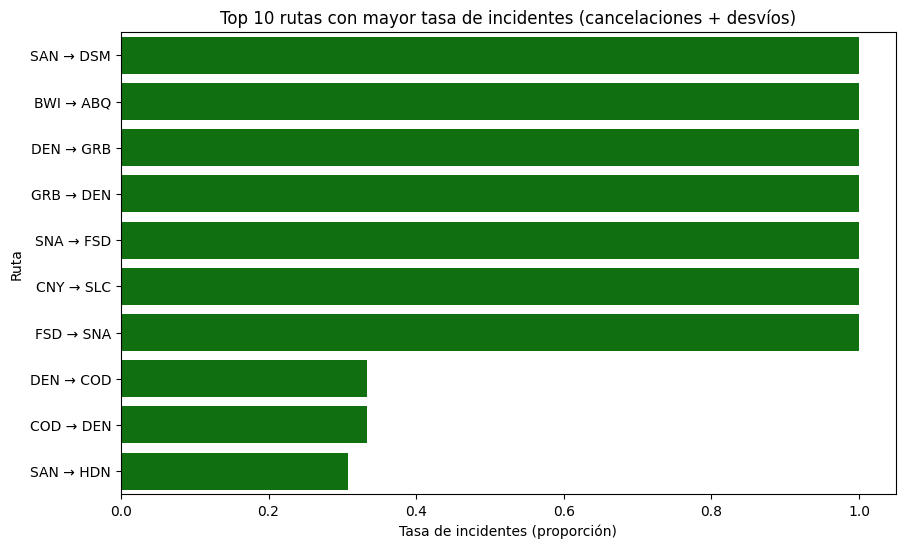

In [ ]:
# @title
# ¿Qué rutas (origen-destino) son más propensas a incidentes?

import matplotlib.pyplot as plt
import seaborn as sns

# Crear columna de incidente (1 si fue cancelado o desviado, 0 en caso contrario)
flights_full["INCIDENT"] = flights_full["CANCELLED"] + flights_full["DIVERTED"]

# Agrupar por rutas
routes = flights_full.groupby(["ORIGIN","DEST"]).agg(
    INCIDENT_RATE=("INCIDENT","mean"),
    NUM_FLIGHTS=("FL_NUMBER","count")
).reset_index()

# Seleccionar top 10 rutas con mayor tasa de incidentes
top_routes = routes.sort_values("INCIDENT_RATE", ascending=False).head(10)

# Crear columna "Ruta" para mejor visualización
top_routes["ROUTE"] = top_routes["ORIGIN"] + " → " + top_routes["DEST"]

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_routes,
    x="INCIDENT_RATE",
    y="ROUTE",
    color="green"
)
plt.title("Top 10 rutas con mayor tasa de incidentes (cancelaciones + desvíos)")
plt.xlabel("Tasa de incidentes (proporción)")
plt.ylabel("Ruta")
plt.show()



**¿En qué horarios se concentran más los retrasos?**

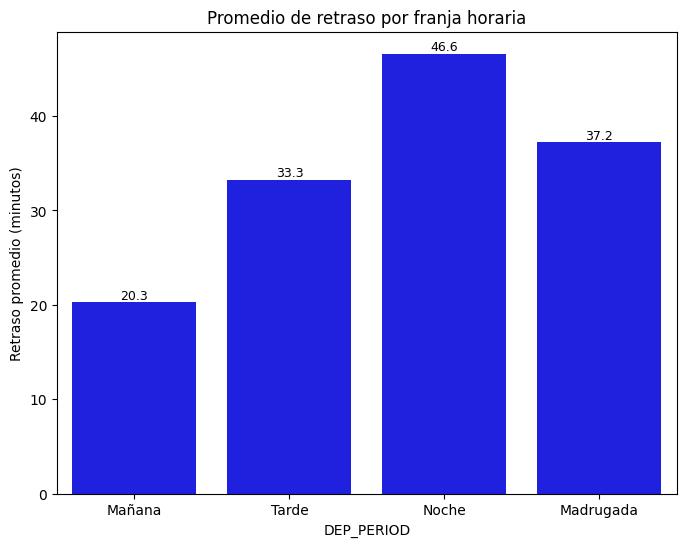

In [ ]:
# @title
# ¿En qué horarios se concentran más los retrasos? (mañana, tarde, noche)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=flights_full,
    x="DEP_PERIOD",
    y="TOTAL_DELAY",
    estimator="mean",
    errorbar=None,
    color="Blue"
)
plt.title("Promedio de retraso por franja horaria")
plt.ylabel("Retraso promedio (minutos)")

# Añadir etiquetas encima de cada barra
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=9, color="black"
    )

plt.show()

/tmp/ipython-input-1138777590.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Día de la semana")


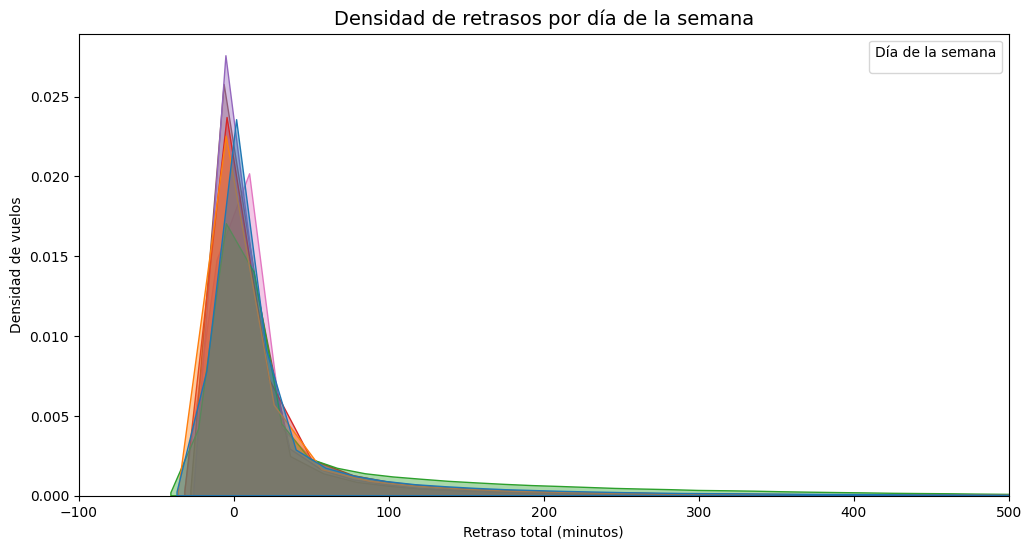

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# KDE por día de la semana
sns.kdeplot(
    data=flights_full,
    x="TOTAL_DELAY",
    hue="DAY_OF_WEEK",
    common_norm=False,   # Cada día con su propia escala
    fill=True,           # Rellenar bajo la curva
    alpha=0.4
)

plt.title("Densidad de retrasos por día de la semana", fontsize=14)
plt.xlabel("Retraso total (minutos)")
plt.ylabel("Densidad de vuelos")
plt.xlim(-100, 500)  # Opcional: limitar rango para evitar outliers extremos
plt.legend(title="Día de la semana")
plt.show()



**Calcular medidas de dispersión**

In [ ]:
# @title
import pandas as pd

# Variables numéricas de interés
num_vars = ["DEP_DELAY", "ARR_DELAY", "TOTAL_DELAY", "FLIGHT_DURATION", "DISTANCE"]

# Funciones de dispersión
dispersion = flights_full[num_vars].agg([
    "var",   # Varianza
    "std",   # Desviación estándar
    "min",   # Valor mínimo
    "max",   # Valor máximo
    "median",# Mediana (para IQR)
    "mean"   # Media (para CV)
]).T

# Calcular rango y IQR manualmente
dispersion["range"] = flights_full[num_vars].max() - flights_full[num_vars].min()
dispersion["iqr"] = flights_full[num_vars].quantile(0.75) - flights_full[num_vars].quantile(0.25)

# Calcular coeficiente de variación
dispersion["cv"] = (dispersion["std"] / dispersion["mean"]) * 100

dispersion


,var,std,min,max,median,mean,range,iqr,cv
DEP_DELAY,3073.144294,55.435948,-52.0,3024.0,-2.0,12.937247,3076.0,16.0,428.498781
ARR_DELAY,3294.393882,57.396811,-80.0,3063.0,-5.0,7.776393,3143.0,26.0,738.090418
TOTAL_DELAY,11366.135915,106.612081,0.0,6087.0,0.0,31.229492,6087.0,18.0,341.382691
FLIGHT_DURATION,5156.863521,71.811305,8.0,695.0,99.0,115.814365,687.0,83.0,62.005525
DISTANCE,360152.263261,600.126873,31.0,5095.0,679.0,830.110802,5064.0,670.0,72.294791


**Datos A Lo Largo Del Tiempo**

**¿Se incrementan cancelaciones en épocas específicas (Dia)?**

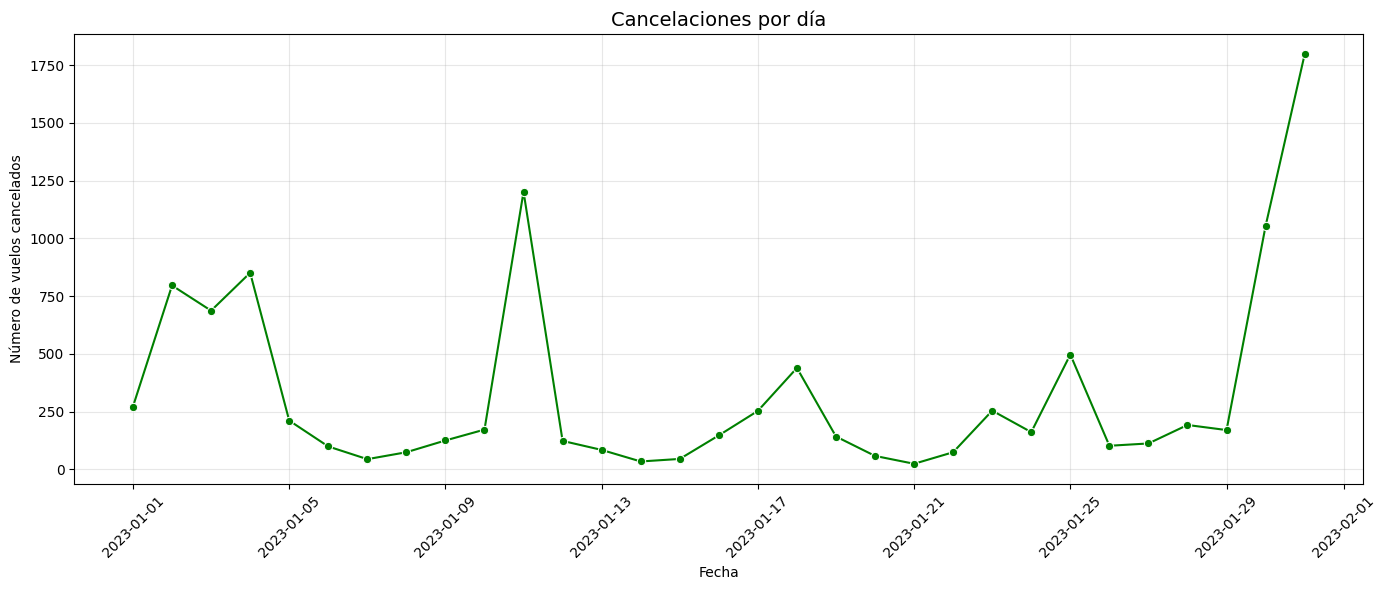

In [ ]:
# @title
# ¿Se incrementan cancelaciones en épocas específicas (Dia)?

import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar fecha como datetime
flights_full["FL_DATE"] = pd.to_datetime(flights_full["FL_DATE"])

# Agrupar por día → número de cancelaciones
daily_cancellations = flights_full.groupby("FL_DATE").agg(
    CANCELLED_COUNT=("CANCELLED", "sum"),
    TOTAL_FLIGHTS=("FL_NUMBER", "count")
).reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_cancellations, x="FL_DATE", y="CANCELLED_COUNT", marker="o", color="green")

plt.title("Cancelaciones por día", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Número de vuelos cancelados")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Calcular Cuartiles, Deciles O Percentiles**

In [ ]:
# @title
import numpy as np
import pandas as pd

# Tomamos la columna DEP_DELAY
dep_delay = flights_full["DEP_DELAY"].dropna()

# 🔹 Cuartiles
quartiles = dep_delay.quantile([0.25, 0.5, 0.75])

# 🔹 Deciles
deciles = dep_delay.quantile([i/10 for i in range(1, 10)])

# 🔹 Percentiles (ejemplo: 1, 5, 95, 99)
percentiles = dep_delay.quantile([0.01, 0.05, 0.95, 0.99])

# Convertir en DataFrames ordenados
quartiles_df = pd.DataFrame(quartiles, columns=["DEP_DELAY"]).rename_axis("Cuartil")
deciles_df = pd.DataFrame(deciles, columns=["DEP_DELAY"]).rename_axis("Decil")
percentiles_df = pd.DataFrame(percentiles, columns=["DEP_DELAY"]).rename_axis("Percentil")

print("📊 Cuartiles:\n", quartiles_df, "\n")
print("📊 Deciles:\n", deciles_df, "\n")
print("📊 Percentiles:\n", percentiles_df, "\n")



📊 Cuartiles:
          DEP_DELAY
Cuartil           
0.25          -6.0
0.50          -2.0
0.75          10.0 

📊 Deciles:
        DEP_DELAY
Decil           
0.1         -9.0
0.2         -6.0
0.3         -5.0
0.4         -3.0
0.5         -2.0
0.6          0.0
0.7          5.0
0.8         16.0
0.9         44.0 

📊 Percentiles:
            DEP_DELAY
Percentil           
0.01           -14.0
0.05           -10.0
0.95            85.0
0.99           212.0 



##Calcular correlación entre variables

**¿Hay patrones de retrasos según el día de la semana y la franja horaria?**

/tmp/ipython-input-841649060.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_by_day_period = flights_full.groupby(["DAY_OF_WEEK","DEP_PERIOD"]).agg(


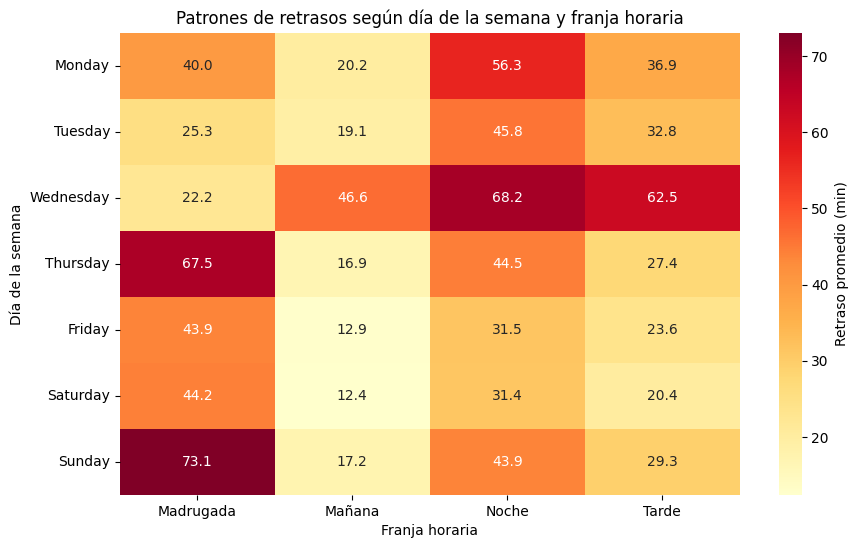

In [ ]:
# @title
#¿Hay patrones de retrasos según el día de la semana y la franja horaria?

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Definir el orden correcto de los días ---
dias_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Asegurar que la columna DAY_OF_WEEK esté en ese orden
flights_full["DAY_OF_WEEK"] = pd.Categorical(
    flights_full["DAY_OF_WEEK"],
    categories=dias_semana,
    ordered=True
)

# --- Calcular retraso promedio ---
delay_by_day_period = flights_full.groupby(["DAY_OF_WEEK","DEP_PERIOD"]).agg(
    AVG_DELAY=("TOTAL_DELAY","mean")
).reset_index()

# --- Pivotear para el heatmap ---
heatmap_data = delay_by_day_period.pivot(
    index="DAY_OF_WEEK",
    columns="DEP_PERIOD",
    values="AVG_DELAY"
)

# --- Graficar ---
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Retraso promedio (min)'})
plt.title("Patrones de retrasos según día de la semana y franja horaria")
plt.xlabel("Franja horaria")
plt.ylabel("Día de la semana")
plt.show()


**¿Los vuelos más largos tienen mayor probabilidad de retraso?**

**¿Existe correlación entre el tamaño del aeropuerto (volumen de vuelos) y los retrasos?**


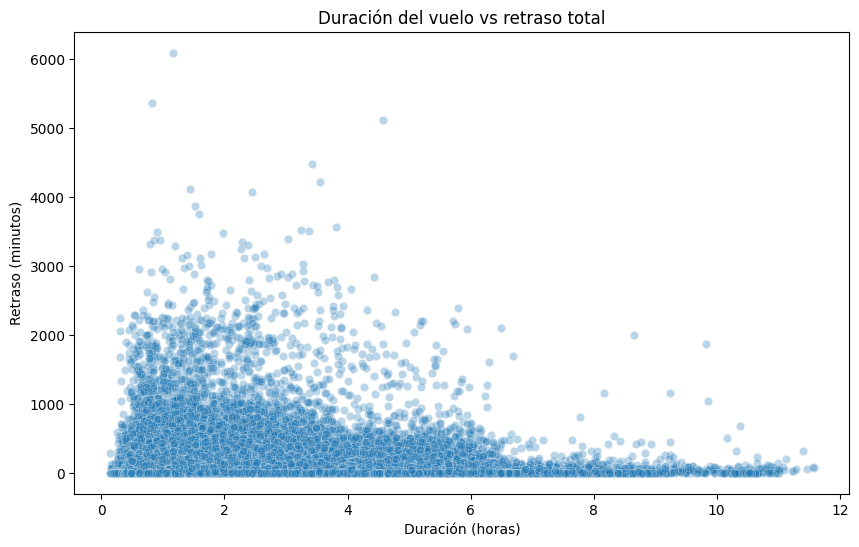

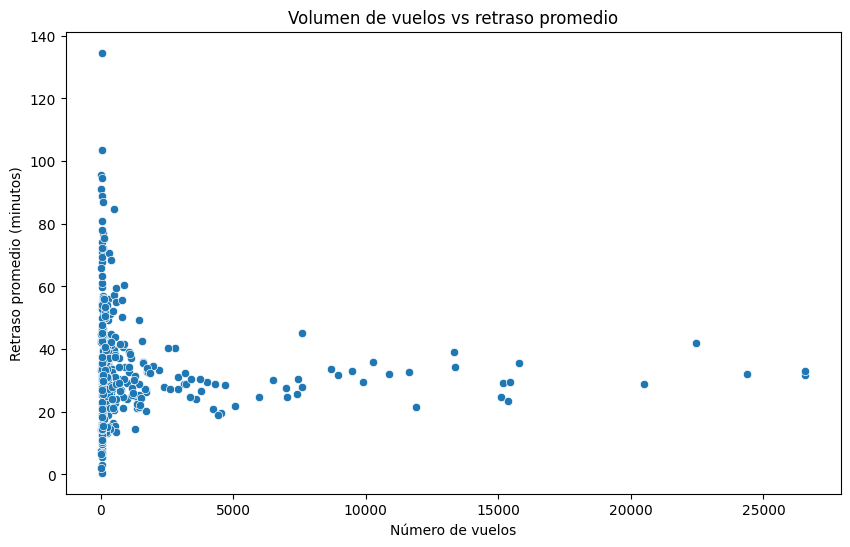

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# ¿Los vuelos más largos tienen mayor probabilidad de retraso?
# ===============================
plt.figure(figsize=(10,6))
sns.scatterplot(data=flights_full, x="FLIGHT_DURATION_HOURS", y="TOTAL_DELAY", alpha=0.3)
plt.title("Duración del vuelo vs retraso total")
plt.xlabel("Duración (horas)")
plt.ylabel("Retraso (minutos)")
plt.show()

# ===============================
# ¿Existe correlación entre el tamaño del aeropuerto (volumen de vuelos) y los retrasos?
# ===============================
airport_stats = flights_full.groupby("ORIGIN_CITY").agg(
    NUM_FLIGHTS=("FL_NUMBER","count"),
    AVG_DELAY=("TOTAL_DELAY","mean")
).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=airport_stats, x="NUM_FLIGHTS", y="AVG_DELAY")
plt.title("Volumen de vuelos vs retraso promedio")
plt.xlabel("Número de vuelos")
plt.ylabel("Retraso promedio (minutos)")
plt.show()


**¿Qué factores influyen más en los retrasos (clima, temas operativos de aerolinea, seguridad,etc)?**


In [ ]:
# @title
#¿Qué factores influyen más en los retrasos (clima, temas operativos de aerolinea, seguridad,etc)?
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

delay_causes = ["DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS",
                "DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT"]

# Lista de aeropuertos
aeropuertos = ["Todos"] + sorted(flights_full["ORIGIN_CITY"].dropna().unique().tolist())

def plot_retrasos_por_aeropuerto(aeropuerto="Todos"):
    df_filtrado = flights_full.copy()

    # Si se selecciona un aeropuerto específico, filtramos
    if aeropuerto != "Todos":
        df_filtrado = df_filtrado[df_filtrado["ORIGIN_CITY"] == aeropuerto]

    # Sumar retrasos por causa
    cause_sums = df_filtrado[delay_causes].sum().sort_values(ascending=False)

    # Gráfico
    plt.figure(figsize=(10,6))
    sns.barplot(x=cause_sums.values, y=cause_sums.index, color="Green")
    plt.title(f"Minutos acumulados de retraso por causa\nAeropuerto: {aeropuerto}")
    plt.xlabel("Minutos")
    plt.ylabel("Causa")
    plt.show()

# 🔹 Menú interactivo
interact(plot_retrasos_por_aeropuerto, aeropuerto=aeropuertos)


interactive(children=(Dropdown(description='aeropuerto', options=('Todos', 'Aberdeen, SD', 'Abilene, TX', 'Ada…

<function __main__.plot_retrasos_por_aeropuerto(aeropuerto='Todos')>